# **Obdachlosigkeit im globalen Vergleich**

# 1. Fragestellung und Datenbeschaffung

**1.1 Team:**
- Jasleen Bal
- Luana Birtone
- Katarina Djuric

**1.2 Fragestellung**

- Welche Länder waren in den Jahren 2018 -2023 am meisten von der Obdachlosigkeit betroffen?
- Was sind Gründe für die Obdachlosigkeit in jeweiligen Länder?

**1.3 Datenquellen**
- [OurWorldInData_Obdachlosigkeit](https://ourworldindata.org/grapher/homelessness-rate-point-in-time-count)
- [OurWorldInData_Population](https://ourworldindata.org/grapher/population-with-un-projections?tab=table&globe=1&globeRotation=65%2C-50.69) 


# 2. Daten beschaffen, laden 

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

**2.1 Obdachlosigkeit** Datenbeschaffung und Ladung

In [2]:
Obdachlosigkeit = pd.read_csv('homelessness-rate-point-in-time-count.csv')
Obdachlosigkeit.head()

,Entity,Code,Year,"Rate of people experiencing homelessness (point-in-time, ETHOS 1)","Rate of people experiencing homelessness (point-in-time, ETHOS 2 and 3)","Rate of people experiencing homelessness (point-in-time, ETHOS 1, 2 and 3)"
0,Australia,AUS,2021,29.737530,94.549700,NaN
1,Canada,CAN,2022,23.891660,80.688620,NaN
2,Costa Rica,CRI,2023,NaN,NaN,86.08506
3,Czechia,CZE,2022,85.877396,198.428830,NaN
4,Denmark,DNK,2022,9.051570,54.190987,NaN


**2.2 Population**
Datenbeschaffung und Ladung

In [3]:
Population = pd.read_csv("population-with-un-projections.csv")
Population.head()

,Entity,Code,Year,Population - Sex: all - Age: all - Variant: estimates,Population - Sex: all - Age: all - Variant: medium
0,Afghanistan,AFG,1950,7776180.0,NaN
1,Afghanistan,AFG,1951,7879343.0,NaN
2,Afghanistan,AFG,1952,7987784.0,NaN
3,Afghanistan,AFG,1953,8096703.0,NaN
4,Afghanistan,AFG,1954,8207954.0,NaN


# 3. Daten vorbereiten

**3.1 Obdachlosigkeit** Datenvorbereitung

Die Tabelle zeigt die Top 10 Länder mit der höchsten Obdachlosigkeit ETHOS 1,2 und 3.

Definitionen:  
- ETHOS = European Typology of Homelessness and Housing Exclusion  
- ETHOS 1 = Obdachlose auf der Straße (keine Unterkunft)
- ETHOS 2 = Unterkunft in Notunterkünften
- ETHOS 3 = Unterbringung in Einrichtungen für bestimmte soziale Zwecke

In [4]:
Obdachlosigkeit = Obdachlosigkeit.rename(columns={"Rate of people experiencing homelessness (point-in-time, ETHOS 2 and 3)":"Obdachlosigkeit ETHOS 2 und 3", "Entity":"Land", "Year":"Jahr", "Rate of people experiencing homelessness (point-in-time, ETHOS 1)":"Obdachlosigkeit ETHOS 1"})
Obdachlosigkeit.drop("Rate of people experiencing homelessness (point-in-time, ETHOS 1, 2 and 3)", axis=1, inplace=True)
Obdachlosigkeit["Obdachlosigkeit ETHOS 1, 2 und 3"] = Obdachlosigkeit["Obdachlosigkeit ETHOS 1"].fillna(0) + Obdachlosigkeit["Obdachlosigkeit ETHOS 2 und 3"]
Obdachlosigkeit_sortiert = Obdachlosigkeit.sort_values(by="Obdachlosigkeit ETHOS 2 und 3", ascending=False)
Obdachlosigkeit_sortiert.head(10)

,Land,Code,Jahr,Obdachlosigkeit ETHOS 1,Obdachlosigkeit ETHOS 2 und 3,"Obdachlosigkeit ETHOS 1, 2 und 3"
20,United Kingdom,GBR,2023,16.498774,409.802730,426.301504
6,France,FRA,2022,8.095070,298.781680,306.876750
10,Ireland,IRL,2023,NaN,253.438260,253.438260
7,Germany,DEU,2022,45.943825,212.534940,258.478765
3,Czechia,CZE,2022,85.877396,198.428830,284.306226
13,New Zealand,NZL,2018,4.223972,130.759490,134.983462
21,United States,USA,2023,75.547935,116.730850,192.278785
0,Australia,AUS,2021,29.737530,94.549700,124.287230
1,Canada,CAN,2022,23.891660,80.688620,104.580280
4,Denmark,DNK,2022,9.051570,54.190987,63.242557


**3.2 Population** Datenvorbereitung

Diese Pivot-Tabelle zeigt die Populationszahlen von den Top 10 Ländern der grössten Obdachlosigkeit (siehe Tabelle 2.1) in den Jahren 1950 bis 2023.

In [5]:
Population = Population.rename(columns={"Entity":"Land", "Year":"Jahr", "Population - Sex: all - Age: all - Variant: estimates":"Einwohnerzahl" })
Population.drop("Population - Sex: all - Age: all - Variant: medium", axis=1, inplace=True)
Population.head(10)
top10_länder = [
    "United Kingdom",
    "France",
    "Czechia",
    "Germany",
    "Ireland",
    "United States",
    "New Zealand",
    "Australia",
    "Canada",
    "Denmark"
]
Population_top10 = Population[Population["Land"].isin(top10_länder)]
Population_top10 = Population_top10[Population_top10["Jahr"].between(2000, 2023)]
Population_top10
pivot = Population_top10.pivot_table(
    index="Jahr",
    columns="Land",
    values="Einwohnerzahl"
)
pivot = pivot.applymap(lambda x: f"{int(x):,}".replace(",", "'"))
pivot

C:\Users\Startklar\AppData\Local\Temp\ipykernel_20492\3608901954.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot = pivot.applymap(lambda x: f"{int(x):,}".replace(",", "'"))


Land,Australia,Canada,Czechia,Denmark,France,Germany,Ireland,New Zealand,United Kingdom,United States
Jahr,,,,,,,,,,
2000,19'132'472,30'891'800,10'236'809,5'339'659,59'483'716,81'797'255,3'802'589,3'857'576,59'057'333,281'484'126
2001,19'365'438,31'213'578,10'231'942,5'358'825,59'905'131,81'933'882,3'862'981,3'891'763,59'288'095,284'279'634
2002,19'595'356,31'535'579,10'239'474,5'375'967,60'327'247,82'068'328,3'928'441,3'951'116,59'540'764,287'084'335
2003,19'819'449,31'836'483,10'248'907,5'390'621,60'741'119,82'111'619,3'992'935,4'022'585,59'820'385,289'908'091
2004,20'046'679,32'132'680,10'261'453,5'404'594,61'175'244,82'092'706,4'066'066,4'083'912,60'169'964,292'786'248
2005,20'294'490,32'440'172,10'280'155,5'419'550,61'625'031,82'046'733,4'155'283,4'135'002,60'596'107,295'716'666
2006,20'590'566,32'759'174,10'304'592,5'437'425,62'049'831,81'701'971,4'268'775,4'181'943,61'051'093,298'730'208
2007,20'954'545,33'092'171,10'337'539,5'461'604,62'432'438,81'298'546,4'393'518,4'223'270,61'535'859,301'844'223
2008,21'370'595,33'449'088,10'378'298,5'493'762,62'780'187,81'110'780,4'485'992,4'261'819,62'027'303,304'970'325


**3.3 Prozentualer Anteil Obdachloser einer Population**

Die Tabellen 3.1 & 3.2 wurden hier gemerged und zeigt den Zusammenhang zwischen der Obdachlosigkeit und der Populationszahl. 
 
Die Column **"Obdachlose_absolut"** zeigt die absolute Anzahl Obdachlosen:  
Berechnung: Obdachlosigkeit ETHOS 1, 2 & 3 / 100000 * Einwohnerzahl  
Die Column **"Obdachlosenrate in %"** zeigt der prozentuale Obdachloserate.  
Berechnung: Obdachlosigkeit ETHOS 1, 2 & 3 / 100000 * 100**3.3

In [72]:
merged=pd.merge(Obdachlosigkeit_sortiert, Population, how='inner', on= ["Land", "Jahr", "Code"]).round(2)
merged["Obdachlose_absolut"] = (merged["Obdachlosigkeit ETHOS 1, 2 und 3"] / 100000 * merged["Einwohnerzahl"]).round(2)
merged["Obdachlosenrate in %"] = (merged["Obdachlosigkeit ETHOS 1, 2 und 3"]/100000*100).round(4)
merged.drop("Obdachlosigkeit ETHOS 2 und 3", axis=1, inplace=True)
merged.drop("Code", axis=1, inplace=True)
merged_Top10 = merged.sort_values(by="Obdachlosenrate in %", ascending=False)
merged_Top10["Einwohnerzahl"] = merged_Top10["Einwohnerzahl"].astype(int).map(lambda x: f"{x:,}".replace(",", "'"))
merged_Top10=merged_Top10.head(10)
merged_Top10.head(10)

,Land,Jahr,Obdachlosigkeit ETHOS 1,"Obdachlosigkeit ETHOS 1, 2 und 3",Einwohnerzahl,Obdachlose_absolut,Obdachlosenrate in %
0,United Kingdom,2023,16.50,426.30,68'682'965,292795.48,0.4263
1,France,2022,8.10,306.88,66'277'412,203392.12,0.3069
4,Czechia,2022,85.88,284.31,10'673'216,30345.02,0.2843
3,Germany,2022,45.94,258.48,84'086'227,217346.08,0.2585
2,Ireland,2023,NaN,253.44,5'196'629,13170.34,0.2534
6,United States,2023,75.55,192.28,343'477'330,660438.21,0.1923
5,New Zealand,2018,4.22,134.98,4'900'840,6615.15,0.1350
7,Australia,2021,29.74,124.29,25'956'417,32261.23,0.1243
8,Canada,2022,23.89,104.58,38'821'259,40599.27,0.1046
9,Denmark,2022,9.05,63.24,5'902'901,3732.99,0.0632


# 4. Statistik der Roh-Date

In [7]:
merged_Top10.dtypes

Land                                 object
Jahr                                  int64
Obdachlosigkeit ETHOS 1, 2 und 3    float64
Einwohnerzahl                        object
Obdachlose_absolut                  float64
Obdachlosenrate in %                float64
dtype: object

**4.1 Analyse Obdachlosigkeit** 

In [8]:
Obdachlosigkeit.describe()

,Jahr,Obdachlosigkeit ETHOS 1,Obdachlosigkeit ETHOS 2 und 3,"Obdachlosigkeit ETHOS 1, 2 und 3"
count,22.000000,16.000000,16.000000,16.000000
mean,2021.500000,24.220721,128.521164,149.332255
std,1.711307,26.781647,115.151596,123.232961
min,2017.000000,1.226886,13.344173,13.344173
25%,2021.000000,5.955014,46.325831,55.089690
50%,2022.000000,12.167279,87.619160,114.433755
75%,2023.000000,33.789104,201.955357,254.698386
max,2023.000000,85.877396,409.802730,426.301504


**4.1.1 Analyse Jahr**

In [9]:
Obdachlosigkeit['Jahr'].value_counts().sort_index()

Jahr
2017    1
2018    1
2019    1
2020    2
2021    2
2022    8
2023    7
Name: count, dtype: int64

**4.2 Analyse Einwohner**

In [10]:
Population.describe()

,Jahr,Einwohnerzahl
count,38656.000000,1.894400e+04
mean,2025.000000,1.306784e+08
std,43.589553,6.009285e+08
min,1950.000000,5.010000e+02
25%,1987.000000,2.858628e+05
50%,2025.000000,3.885507e+06
75%,2063.000000,1.746007e+07
max,2100.000000,8.091735e+09


**4.3 Analyse Obdachlosigkeit pro Land**

Der untere plot zeigt das Verhältnis zwischen ETHOS 1 und ETHOS 2&3

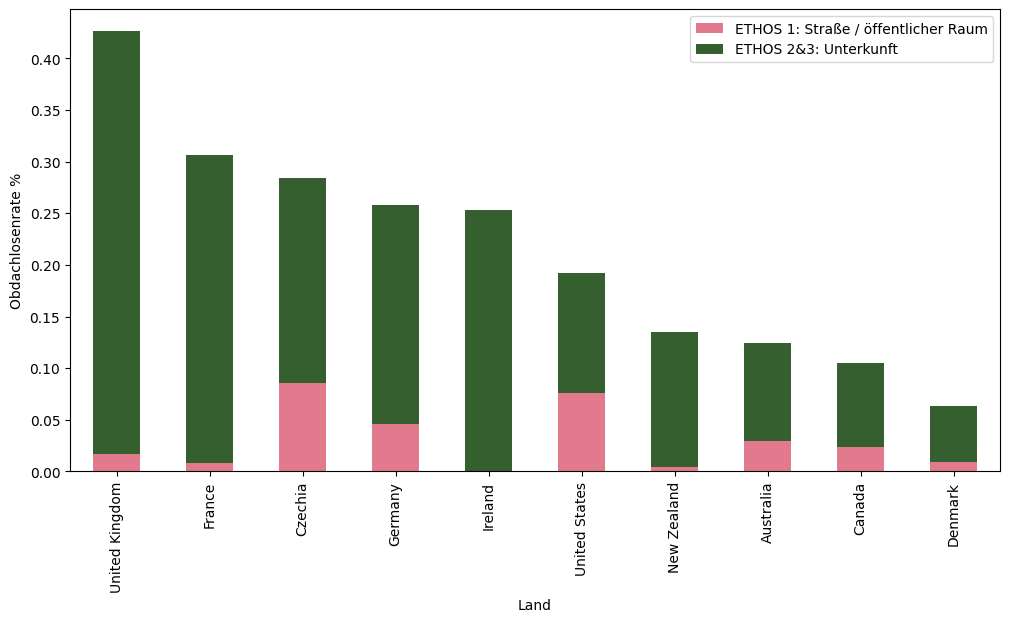

In [73]:
merged["Obdachlosenrate EtHOS 1%"] = (merged["Obdachlosigkeit ETHOS 1"]/100000*100).round(4)
merged = merged.sort_values(by="Obdachlosigkeit ETHOS 1, 2 und 3",ascending=False)
merged = merged.head(10)
merged['ETHOS'] = merged["Obdachlosenrate EtHOS 1%"].fillna(0)
merged['Rest'] = merged["Obdachlosenrate in %"] - merged["ETHOS"]
ax = merged.plot.bar(x="Land",y=["Obdachlosenrate EtHOS 1%", "Rest"],stacked=True,figsize=(12, 6),color=["#e07a8c", "#355f2e"],legend=True,ylabel="Obdachlosenrate %")
ax.legend(["ETHOS 1: Straße / öffentlicher Raum", "ETHOS 2&3: Unterkunft"], loc='upper right')

# 5. Analyse

**Vorgehen**

**Beobachtungen**

**Interpretation**

**Berechnungen**

**Visualisierung**